<a href="https://colab.research.google.com/github/wahyupratama18/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Ubah brightness
---------------
Masukkan nilai brightness: -20


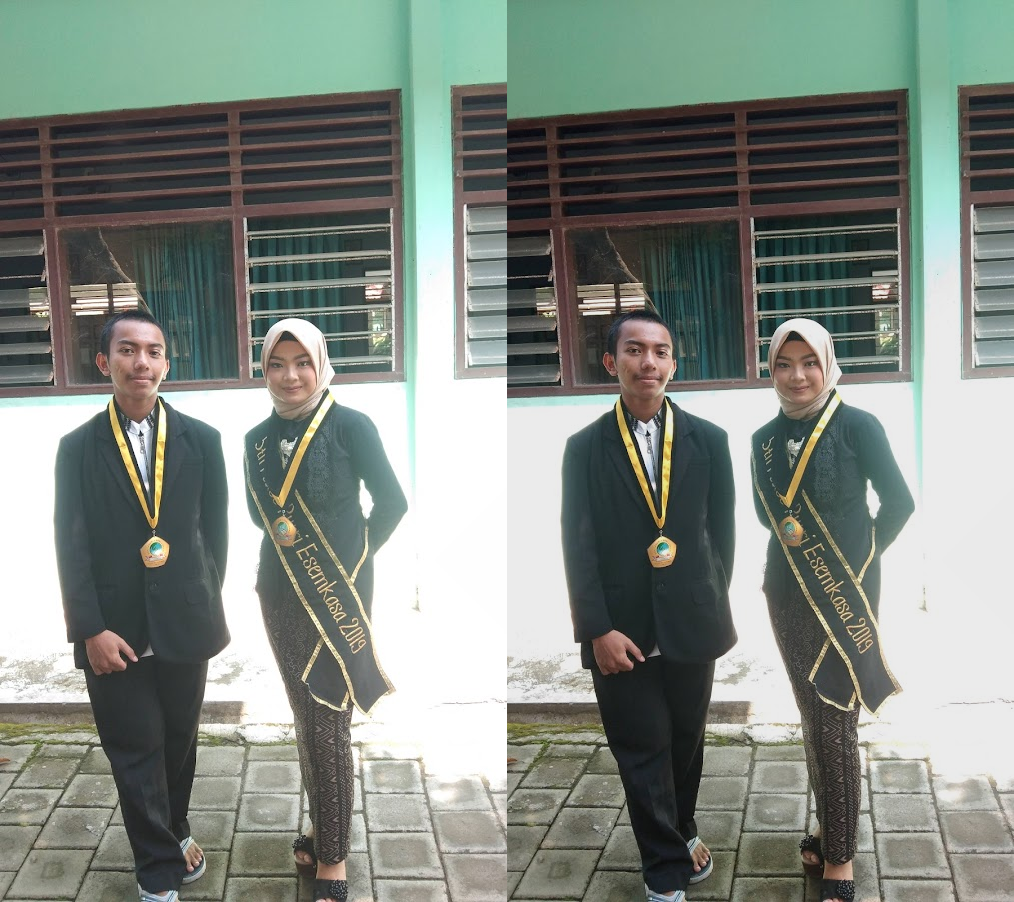

In [5]:
print('Ubah brightness')
print('---------------')

try:
  brightness = int(input('Masukkan nilai brightness: '))
except ValueError:
  print('NaN')

original = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
brightnessImg = np.zeros(original.shape, original.dtype)

# pixel access
# for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#     for c in range(original.shape[2]):
#       brightnessImg[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)

# other way
brightnessImg = cv.convertScaleAbs(original, beta=brightness)

final = cv.hconcat((original, brightnessImg))
cv2_imshow(final)

Ubah brightness & contrast
---------------
Masukkan nilai brightness: -30
Masukkan nilai kontras: 1


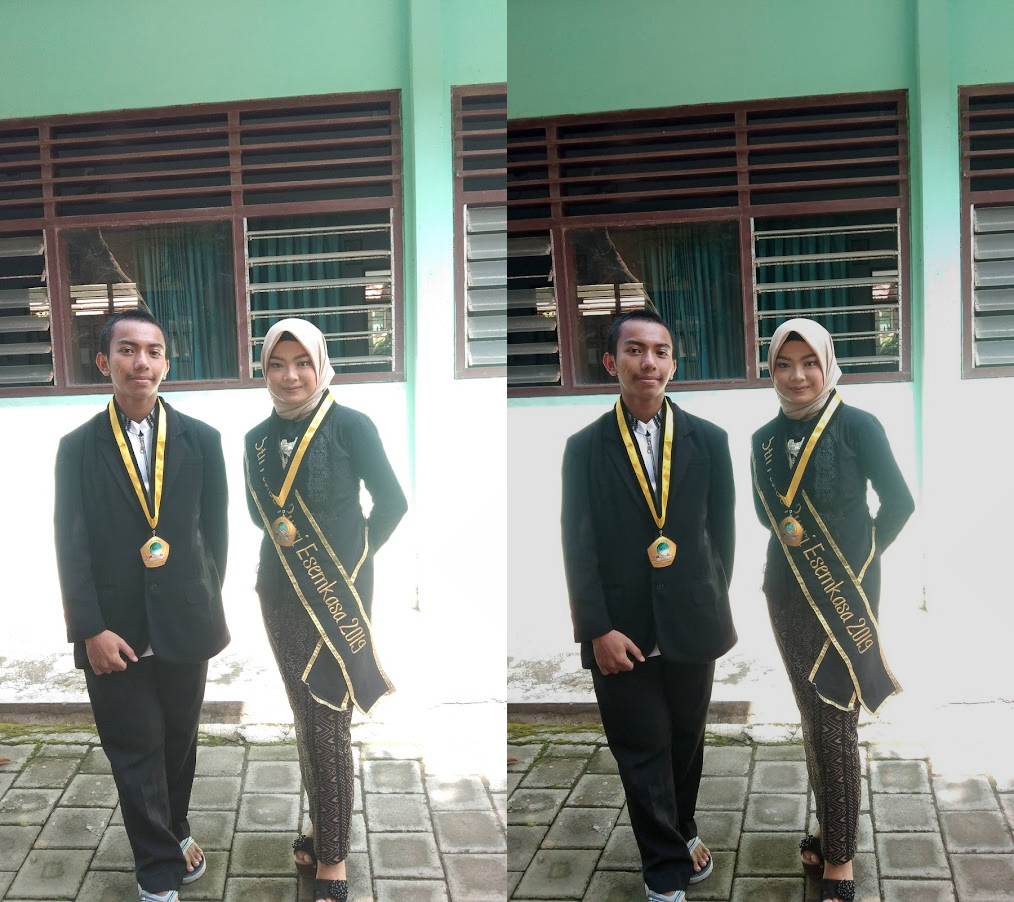

In [8]:
print('Ubah brightness & contrast')
print('---------------')

try:
  brightness = float(input('Masukkan nilai brightness: '))
  contrast = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('NaN')

original = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
brightnessImg = np.zeros(original.shape, original.dtype)

# pixel access
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightnessImg[y, x, c] = np.clip(original[y,x,c] + brightness * contrast, 0, 255)

final = cv.hconcat((original, brightnessImg))
cv2_imshow(final)

Ubah brightness logaritmic
---------------
Masukkan nilai brightness: 42


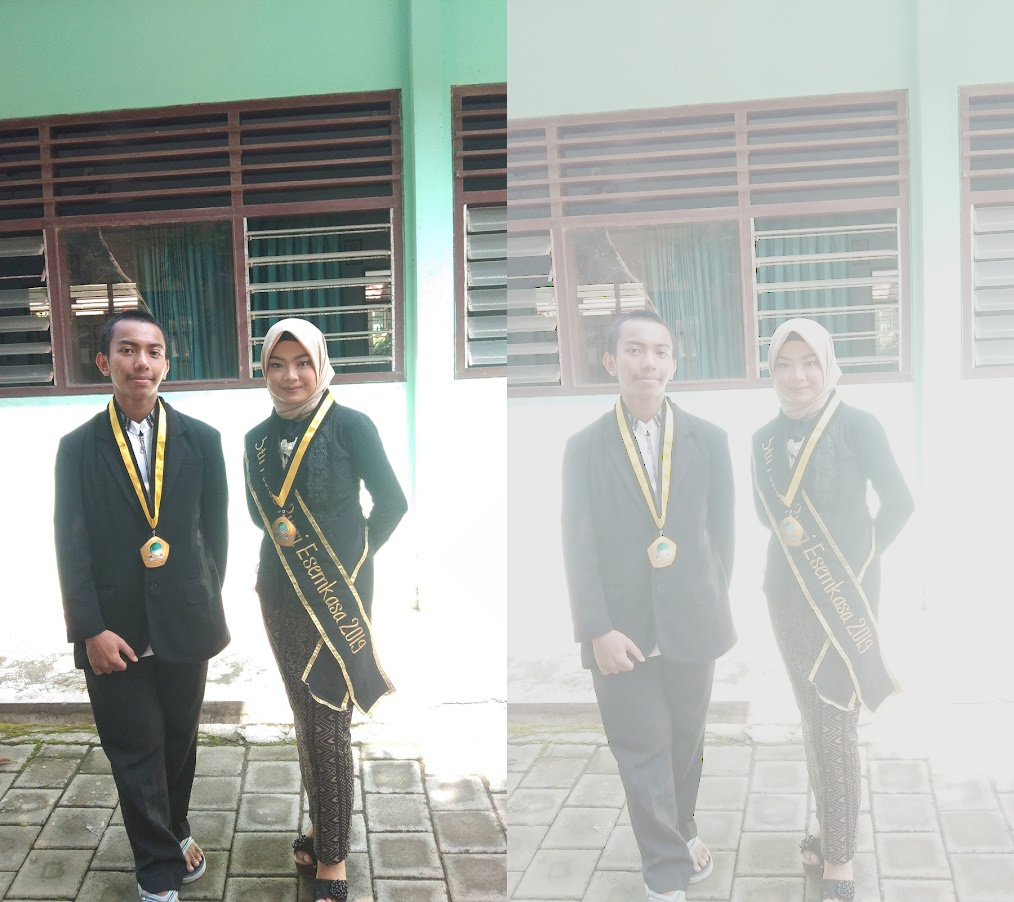

In [27]:
print('Ubah brightness logaritmic')
print('---------------')

try:
  brightness = int(input('Masukkan nilai brightness: '))
except ValueError:
  print('NaN')

original = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
brightnessImg = np.zeros(original.shape, original.dtype)

# pixel access
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightnessImg[y, x, c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final = cv.hconcat((original, brightnessImg))
cv2_imshow(final)

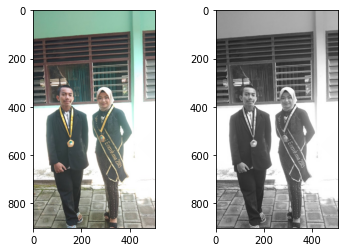

In [16]:
# averaging

img = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# R = image[:,:,0]
# G = image[:,:,1]
# B = image[:,:,2]
gray[:] = np.sum(gray, axis=-1, keepdims=1)/3

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(image)
axarr[1].imshow(gray)

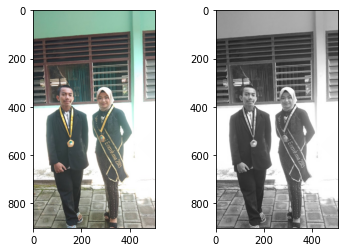

In [18]:
# Lightness

img = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
light = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# R = image[:,:,0]
# G = image[:,:,1]
# B = image[:,:,2]
light[:] = (np.max(light, axis=-1, keepdims=1)/2) + (np.min(light, axis=-1, keepdims=1)/2)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(image)
axarr[1].imshow(light)

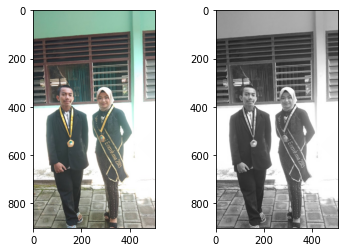

In [19]:
# Luminance

img = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
luminance = (.21 * R) + (.72 * G) + (.07 * B)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(image)
axarr[1].imshow(light, cmap='gray')

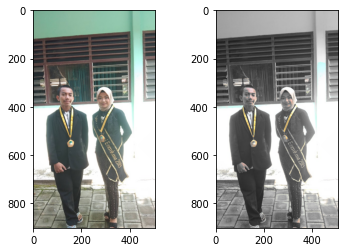

In [23]:
img = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
fining = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img[:,:,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:,:,0] = mask3[:,:,1] = mask3[:,:,2] = mask

red = cv.bitwise_and(fining, mask3)
gray = cv.cvtColor(fining, cv.COLOR_BGR2GRAY)
fining = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(fining, 255 - mask3)

ed = gray + red

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(image)
axarr[1].imshow(ed, cmap='gray')